                                              **Recurrent Neural Network**

 A recurrent neural network is a type of network that is used to process tha data which is  sequential in nature. For example: stock price data, text sentences or sales of items.

Sequential Data is a type of data where the value of the data at time step T depends on the values of the data at timesteps less than T.  

The sound waves, text sentences and the stock market prices etc. In the stock market price pprediction, the value of the opening price of the stock. at a given data depends upon the opening stock price of previous days.

the difference in the architexture of a RNN and a simple neural network is given as:  
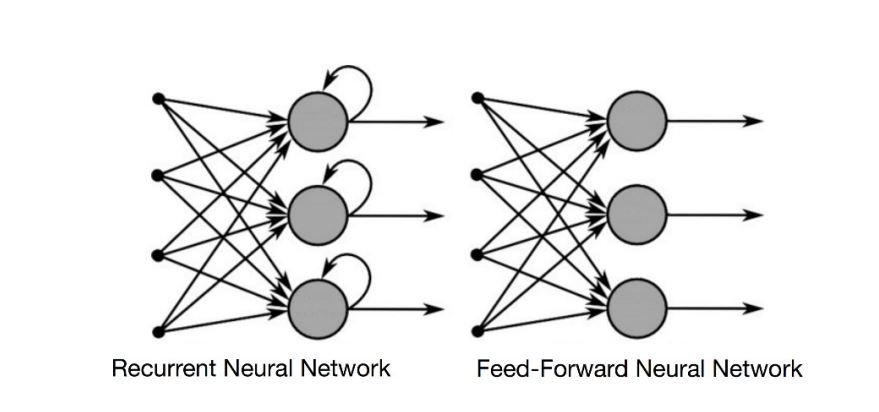

In the recurrent neural network, as we can see that, each time step, the previous output of the neuron is multiplied by the current via a weight vector.

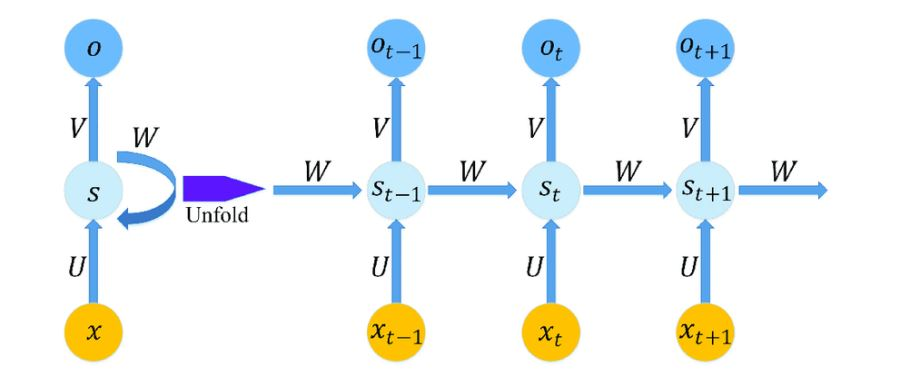

Like, in the above figure we can see that, we have a single neuron with one input and one output. The process followed by the recurrent neural network is unfolded. At time step t, the input is multipilied by the weight vector U while the previus output at time t-1 ie. St-1 is multipplied by weight vector W.  

The sum of the input vector XU+SW becomes the output at time T. this is how a RNN captures the sequential information.

                                              Problems with RNN
A major problem with RNN which occurs is that while it can capture a shorter sequence, it tends to forget the longer sequence.  

It is eaire to predict the missing word in the  shorter sentences but quite difficult to predict in the longer sequences.

To solve this problem, LSTM has been developed which means that Long Short Term Memory has been developed.

                                           LSTM
 LSTM is a type of RNN that is capable of remembering the longer sequences and hence it is one of the most commonly used RNN for sequence tasks.

 In LSTM, instead of a single unit in the recurrent cell, there are four interacting units, that is a forget gate, an input gate, update gate and an output gate.

The overall architecture of LSTM cell is shown in the figure as: 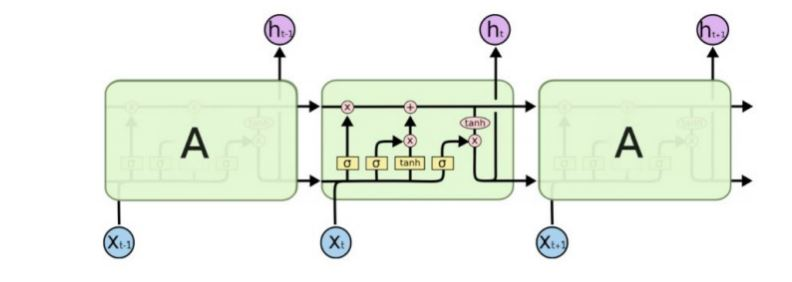

The CEll stte in LSTM is responsible for remembering A LONG SEQUENCE. tHE cell state contains the data from the all previous cells  In the sequence.  

The LSTM  is capable of adding or removing the information to a cell state. LSTM tells the cell state hich part of the previous information is to remeber and which to foorget.

Forget Gate : The Forget gate basically tells the cell state which information to retain from the information in the previous step and which information to forget.

Input Gate : The forget gate is used to decide which information to reembr or forget. The input gate is responsible for updating or adding any new information in the cell state.  

The input gate has  has two parts: an input layer which decides the part of the cell state and the tanh layer that which actually creates a vector layer of new values that are added or replaced in the cell state.

Update Gate : The forget gate tells that us what to forget and the input gate tell us what to add to the cell state.  

The next dtep is actually to perform these 2 operations. The update gate is basically used to perform the 2 operations.

Output Gate : Finally, we have the output gate which outputs the hidden state and the output just like the a common recurrent neural network. The additional state from teh LSTM is a cell state which runs between all the nodes in a sequences.

In [1]:
# import the training dataset and execute the script
import pandas as pd
import numpy as np
fb_complete_data = pd.read_csv("/fb_data.csv")

fb_complete_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-09-07,40.522499,40.560001,40.090000,40.314999,38.261566,87714000
1,2017-09-08,40.215000,40.287498,39.632500,39.657501,37.637562,114446000
2,2017-09-11,40.125000,40.512501,39.972500,40.375000,38.318501,126323200
3,2017-09-12,40.652500,40.990002,39.692501,40.215000,38.166664,286856000
4,2017-09-13,39.967499,39.990002,39.477501,39.912498,37.879570,179629600
...,...,...,...,...,...,...,...
1253,2022-08-30,162.130005,162.559998,157.720001,158.910004,158.910004,77906200
1254,2022-08-31,160.309998,160.580002,157.139999,157.220001,157.220001,87991100
1255,2022-09-01,156.639999,158.419998,154.669998,157.960007,157.960007,74229900
1256,2022-09-02,159.750000,160.360001,154.970001,155.809998,155.809998,76905200


In [2]:
# printing the first 5 rows of the dataset
fb_complete_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-09-07,40.522499,40.560001,40.090000,40.314999,38.261566,87714000
1,2017-09-08,40.215000,40.287498,39.632500,39.657501,37.637562,114446000
2,2017-09-11,40.125000,40.512501,39.972500,40.375000,38.318501,126323200
3,2017-09-12,40.652500,40.990002,39.692501,40.215000,38.166664,286856000
4,2017-09-13,39.967499,39.990002,39.477501,39.912498,37.879570,179629600


The output shows that the dataset consist of the seven columns. Hoever, in this section, we are only interested in the Open Column. We will select the open column from the dataset.

In [4]:
# filtering the open column
fb_training_processed = fb_complete_data[['Open']]
fb_training_processed

,Open
0,40.522499
1,40.215000
2,40.125000
3,40.652500
4,39.967499
...,...
1253,162.130005
1254,160.309998
1255,156.639999
1256,159.750000


In [6]:
# Now, we will scale the dataset
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0,1))

fb_training_scaled = sc.fit_transform(fb_training_processed)
fb_training_scaled


array([[0.03087598],
       [0.02877895],
       [0.02816518],
       ...,
       [0.82275715],
       [0.84396628],
       [0.82159783]])

In [7]:
len(fb_training_scaled)
# Here as we can see that the total length of the training dataset is showing 1258

1258

Before going further, we need to divide the data into the features and labels  

Our feature set will contain the 60 time steps of 1 feature. The feature set will basically consists of the opening stock price of the past 60 days while the label set will contain the opening stock price of 61st day.

In [8]:
# Training the daa will contain the data of the last 60 days
# training labels contain the data  of the 61st day

fb_training_features = []
fb_training_labels = []

for i in range(60, len(fb_training_scaled)):
  fb_training_features.append(fb_training_scaled[i-60:i, 0])
  fb_training_labels.append(fb_training_scaled[i,0])


In [9]:
# We need to convert our data into the nummpy array before we can use an input as keras.
x_train = np.array(fb_training_features)
y_train = np.array(fb_training_labels)

In [10]:
x_train # Data on which model is trained

array([[0.03087598, 0.02877895, 0.02816518, ..., 0.05169299, 0.04884579,
        0.04509496],
       [0.02877895, 0.02816518, 0.03176255, ..., 0.04884579, 0.04509496,
        0.0442766 ],
       [0.02816518, 0.03176255, 0.02709108, ..., 0.04509496, 0.0442766 ,
        0.04859003],
       ...,
       [0.73894365, 0.76779076, 0.75756128, ..., 0.85351376, 0.86019709,
        0.84778528],
       [0.76779076, 0.75756128, 0.71118761, ..., 0.86019709, 0.84778528,
        0.82275715],
       [0.75756128, 0.71118761, 0.66065395, ..., 0.84778528, 0.82275715,
        0.84396628]])

In [11]:
y_train # Data oon whch the model is trained

array([0.0442766 , 0.04859003, 0.04275923, ..., 0.82275715, 0.84396628,
       0.82159783])

In [13]:
print(x_train.shape)
print(y_train.shape)

(1198, 60)
(1198,)


In [14]:
# Converting the data into the 3D shape
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train

array([[[0.03087598],
        [0.02877895],
        [0.02816518],
        ...,
        [0.05169299],
        [0.04884579],
        [0.04509496]],

       [[0.02877895],
        [0.02816518],
        [0.03176255],
        ...,
        [0.04884579],
        [0.04509496],
        [0.0442766 ]],

       [[0.02816518],
        [0.03176255],
        [0.02709108],
        ...,
        [0.04509496],
        [0.0442766 ],
        [0.04859003]],

       ...,

       [[0.73894365],
        [0.76779076],
        [0.75756128],
        ...,
        [0.85351376],
        [0.86019709],
        [0.84778528]],

       [[0.76779076],
        [0.75756128],
        [0.71118761],
        ...,
        [0.86019709],
        [0.84778528],
        [0.82275715]],

       [[0.75756128],
        [0.71118761],
        [0.66065395],
        ...,
        [0.84778528],
        [0.82275715],
        [0.84396628]]])

The script contains our LSTM model. We have 4 LSTM layers with 100 nodes each. Each LSTM is followed by a dropout layer t avoid overfiting. the final dense has one node since output is a single value.

In [15]:
# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

from keras.layers import Input, Activation, Dense, Flatten, Dropout, LSTM
from keras.models import Model

In [18]:
# Defining the LSTM Network
input_layer = Input(shape = (x_train.shape[1], 1))
lstm1 = LSTM(100, activation = 'relu', return_sequences = True)(input_layer)

do1 = Dropout(0.1)(lstm1)
lstm2 = LSTM(100, activation = 'relu', return_sequences = True)(do1)

do2 = Dropout(0.2)(lstm2)
lstm3 = LSTM(100, activation ='relu', return_sequences = True)(do2)

do3 =Dropout(0.2)(lstm3)
lstm4 = LSTM(100, activation = 'relu')(do3)

do4 =Dropout(0.2)(lstm4)

output_layer =Dense(1)(do4)
model = Model(input_layer, output_layer)
model.compile(optimizer = 'adam', loss = 'mse')



In [19]:
print(x_train.shape)
print(y_train.shape)

y_train = y_train.reshape(-1,1)
print(y_train.shape)

(1198, 60, 1)
(1198,)
(1198, 1)


In [24]:
model_history = model.fit(x_train, y_train, epochs=100, verbose=1, batch_size = 32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 184ms/step - loss: 0.0035
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 182ms/step - loss: 0.0033
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 153ms/step - loss: 0.0026
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 182ms/step - loss: 0.0030
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 155ms/step - loss: 0.0029
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 182ms/step - loss: 0.0027
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 153ms/step - loss: 0.0024
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 182ms/step - loss: 0.0026
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 154ms/step - loss: 0.0026
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 185ms/step - loss: 0.0025
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 158ms/step - loss: 0.0025
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 176ms/step - loss: 0.0024
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 162ms/step - loss: 0.0023
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 172ms/step - loss: 0.0025
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6

In [25]:
# Testing the stock prediction model
fb_testing_complete_data =pd.read_csv("/fb_data.csv")
fb_testing_process = fb_testing_complete_data[['Open']].values

Lets concatenate the training set and test set. We do this to predict the first value in the test set. the input will be the data from teh past 60 days.

In [27]:
fb_all_data = pd.concat((fb_complete_data['Open'], fb_testing_complete_data['Open']), axis = 0)
fb_all_data

,Open
0,40.522499
1,40.215000
2,40.125000
3,40.652500
4,39.967499
...,...
1253,162.130005
1254,160.309998
1255,156.639999
1256,159.750000


In [28]:
test_inputs = fb_all_data[len(fb_all_data) - len(fb_testing_complete_data) - 60:].values
print(test_inputs.shape)

(1318,)


We need to scale our data and convert it to column vector.

In [30]:
test_inputs = test_inputs.reshape(-1,1)
test_inputs = sc.transform(test_inputs)
print(test_inputs.shape)

(1318, 1)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


now, we need to divide our data into the features and labels.

In [31]:
fb_test_features = []
for i in range (60, 80):
  fb_test_features.append(test_inputs[i-60:i,0])

In [32]:
x_test = np.array(fb_test_features)
print(x_test.shape)

(20, 60)


Our feature is currently 2 dimensional. But the LSTM algorithm in Keras accepts the data in 3 dimensional.

In [33]:
# converting the test dat into 3D shape
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

print(x_test.shape)

(20, 60, 1)


Now, we make predictions on the test set

In [34]:
y_pred = model.predict(x_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 674ms/step


array([[0.8393295 ],
       [0.79766536],
       [0.74116755],
       [0.6764692 ],
       [0.59713113],
       [0.50013685],
       [0.40701723],
       [0.31641948],
       [0.22702503],
       [0.15029368],
       [0.09716144],
       [0.0668662 ],
       [0.05212267],
       [0.0457903 ],
       [0.04345101],
       [0.04274386],
       [0.04218054],
       [0.04201593],
       [0.04219005],
       [0.04265848]], dtype=float32)

In [35]:
# Cnverting the scaled data back to original data
y_pred = sc.inverse_transform(y_pred)
y_pred

array([[159.07007 ],
       [152.96066 ],
       [144.6761  ],
       [135.18907 ],
       [123.55533 ],
       [109.33257 ],
       [ 95.67797 ],
       [ 82.39317 ],
       [ 69.28482 ],
       [ 58.033314],
       [ 50.242268],
       [ 45.799923],
       [ 43.638004],
       [ 42.709457],
       [ 42.36644 ],
       [ 42.262745],
       [ 42.180145],
       [ 42.156002],
       [ 42.181538],
       [ 42.250225]], dtype=float32)

Finally to compare the actual price of the facebook stock price with the actual stock price we have to make the ppredictions via visualization

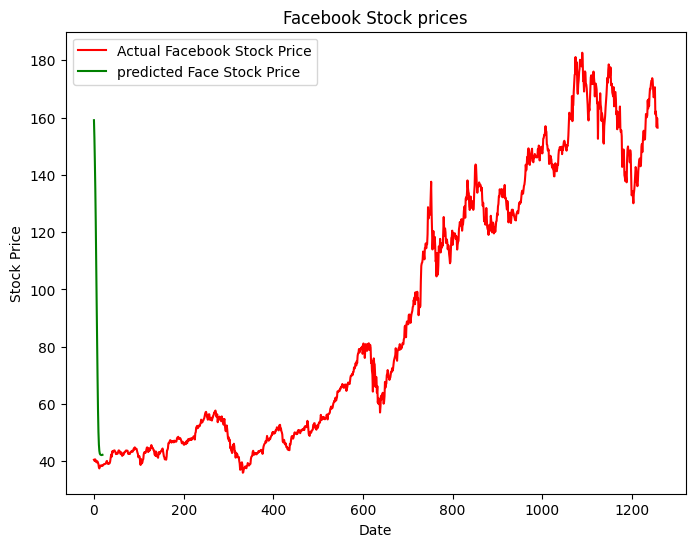

In [36]:
plt.figure(figsize = (8,6))
plt.plot(fb_testing_process, color  = 'red', label = 'Actual Facebook Stock Price')

plt.plot(y_pred, color = 'green', label  = 'predicted Face Stock Price')

plt.title("Facebook Stock prices")

plt.xlabel("Date")
plt.ylabel('Stock Price')
plt.legend()
plt.show()

The output basically shows that the algorithm has been able to partially predict the trend of the future opening stock prices of Facebook Data.